In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

Using TensorFlow backend.


In [2]:
train = pd.read_csv('dataset\sign_mnist_train\sign_mnist_train.csv')
test = pd.read_csv('dataset\sign_mnist_train\sign_mnist_train.csv')

In [3]:
train_data = np.array(train, dtype = 'float32')
test_data = np.array(test, dtype='float32')

In [4]:
#Define class labels for easy interpretation
class_names = list(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I','J','K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y'])

Label for the image is:  K


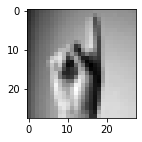

In [5]:
#Sanity check - plot a few images and labels
i = random.randint(1,train.shape[0])
fig1, ax1 = plt.subplots(figsize=(2,2))
plt.imshow(train_data[i,1:].reshape((28,28)), cmap='gray')
print("Label for the image is: ", class_names[int(train_data[i,0])])

Text(0.5, 1.0, 'Label')

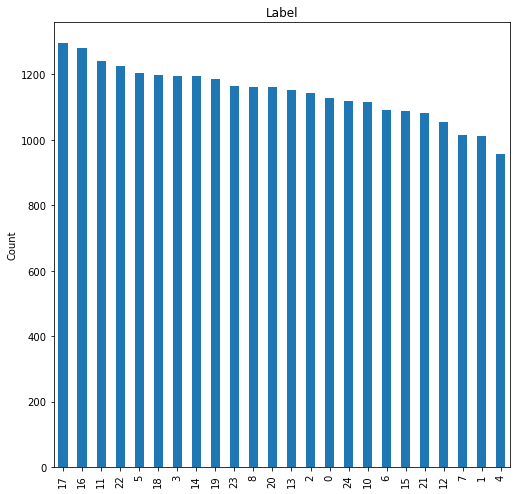

In [6]:
# Data distribution visualization
fig = plt.figure(figsize=(18,18))
ax1 = fig.add_subplot(221)
train['label'].value_counts().plot(kind='bar', ax=ax1)
ax1.set_ylabel('Count')
ax1.set_title('Label')

In [7]:
#Normalize / scale X values
X_train = train_data[:, 1:] /255.
X_test = test_data[:, 1:] /255.

In [8]:
#Convert y to categorical if planning on using categorical cross entropy
#No need to do this if using sparse categorical cross entropy
y_train = train_data[:, 0]
#y_train_cat = to_categorical(y_train, num_classes=24)

In [9]:
y_test = test_data[:,0]
#y_test_cat = to_categorical(y_test, num_classes=25)

In [10]:
#Reshape for the neural network
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))

In [11]:
#Model 1

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dense(25, activation = 'softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [12]:
model.compile(loss ='sparse_categorical_crossentropy', optimizer='adam', metrics =['acc'])
#model.compile(loss ='categorical_crossentropy', optimizer='adam', metrics =['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 128)        

In [13]:
history = model.fit(X_train, y_train, batch_size = 128, epochs = 10, validation_split=0.2, validation_data = (X_test, y_test))
#history = model.fit(X_train, y_train_cat, batch_size = 128, epochs = 10, verbose = 1, validation_data = (X_test, y_test_cat))


Train on 27455 samples, validate on 27455 samples
Epoch 1/10
27455/27455 [==============================] - 46s 2ms/step - loss: 2.6119 - acc: 0.1931 - val_loss: 1.4669 - val_acc: 0.5226
Epoch 2/10
27455/27455 [==============================] - 46s 2ms/step - loss: 1.1070 - acc: 0.6274 - val_loss: 0.5604 - val_acc: 0.8354
Epoch 3/10
27455/27455 [==============================] - 52s 2ms/step - loss: 0.6182 - acc: 0.7883 - val_loss: 0.2848 - val_acc: 0.9316
Epoch 4/10
27455/27455 [==============================] - 48s 2ms/step - loss: 0.3779 - acc: 0.8729 - val_loss: 0.1346 - val_acc: 0.9695
Epoch 5/10
27455/27455 [==============================] - 48s 2ms/step - loss: 0.2554 - acc: 0.9165 - val_loss: 0.0630 - val_acc: 0.9915
Epoch 6/10
27455/27455 [==============================] - 54s 2ms/step - loss: 0.1831 - acc: 0.9419 - val_loss: 0.0397 - val_acc: 0.9951
Epoch 7/10
27455/27455 [==============================] - 48s 2ms/step - loss: 0.1327 - acc: 0.9577 - val_loss: 0.0192 - val_ac

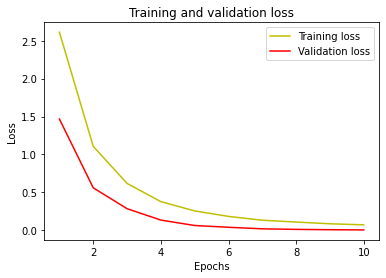

In [14]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

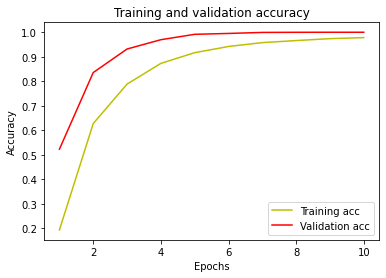

In [15]:
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [16]:
from sklearn.metrics import accuracy_score
prediction = model.predict_classes(X_test)
accuracy = accuracy_score(y_test, prediction)
print('Accuracy Score = ', accuracy)

Accuracy Score =  0.9999635767619741


In [17]:
accuracy = model.evaluate(x=X_test,y=y_test,batch_size=32)
print("Accuracy: ",accuracy[1])

27455/27455 [==============================] - 11s 388us/step
Accuracy:  0.9999635815620422


Predicted Label:  E
True Label:  E


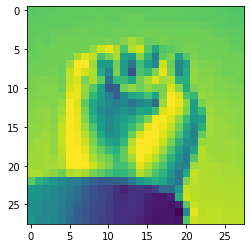

In [21]:
i = random.randint(1,len(prediction))
plt.imshow(X_test[i,:,:,0]) 
print("Predicted Label: ", class_names[int(prediction[i])])
print("True Label: ", class_names[int(y_test[i])])

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

<AxesSubplot:>

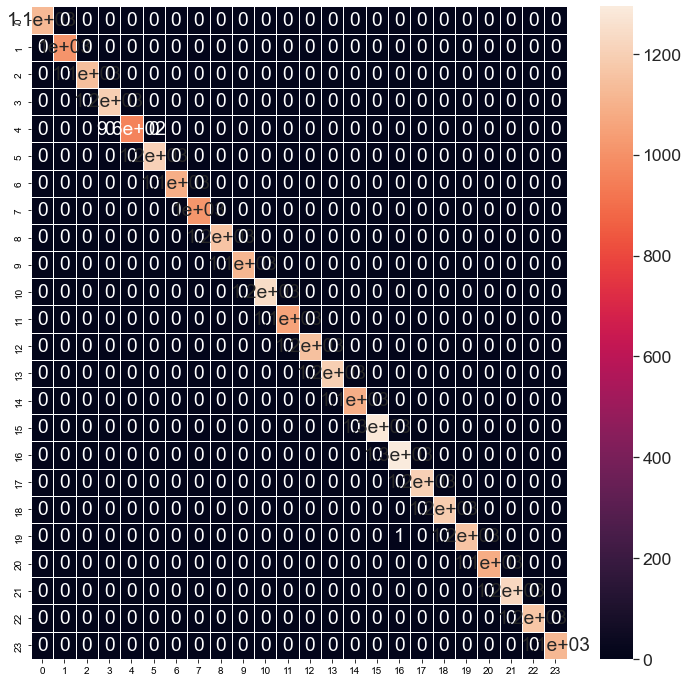

In [23]:
cm = confusion_matrix(y_test, prediction)
fig, ax = plt.subplots(figsize=(12,12))
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)

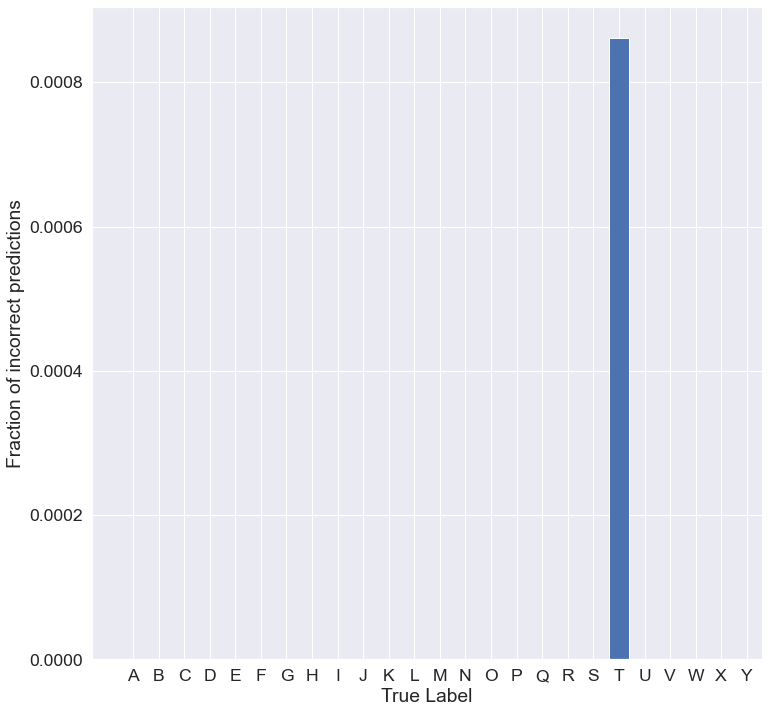

In [24]:
#PLot fractional incorrect misclassifications
incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)
fig, ax = plt.subplots(figsize=(12,12))
plt.bar(np.arange(24), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')
plt.xticks(np.arange(25), class_names)
plt.show()

In [25]:
# Save Model
model.save('models/model2.h5')

In [ ]:
#Model2

model2 = Sequential()

model2.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
model2.add(Conv2D(32, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size = (2, 2)))

model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size = (2, 2)))

model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(Conv2D(25, (1,1)))

model2.add(Flatten())

model2.add(Dense(25, activation = 'softmax'))

model2.compile(loss ='categorical_crossentropy', optimizer='adam',metrics =['acc'])
model2.summary()

history2 = model2.fit(X_train, y_train_cat, batch_size = 128, epochs = epochs, verbose = 1, validation_data = (X_test, y_test_cat))

model2.save('saved_models/model2.hdf5')